In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Step 1: Dataset Gathering


In [ ]:
url="/content/iris.csv"

In [ ]:
iris=pd.read_csv(url)

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head(10)  #by default 5 entries

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris[20:25]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa


<Axes: xlabel='variety', ylabel='sepal.length'>

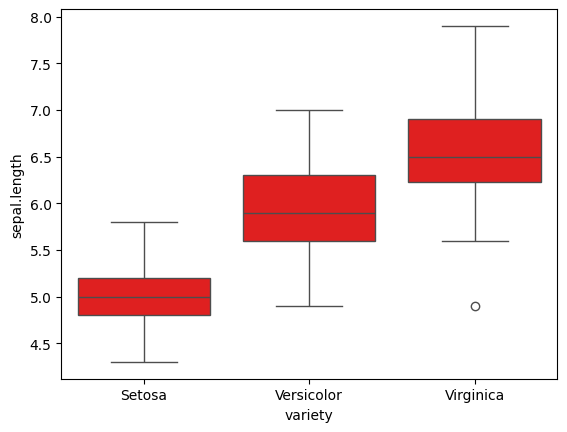

In [ ]:
sns.boxplot(x='variety', y='sepal.length', data=iris, color='red')


<Axes: xlabel='variety', ylabel='sepal.width'>

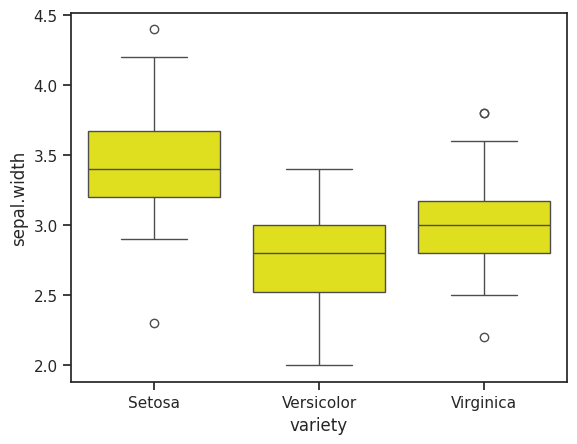

In [ ]:
sns.set(style="ticks")
sns.boxplot(x='variety', y='sepal.width', data=iris, color='yellow')

<Axes: xlabel='variety', ylabel='petal.length'>

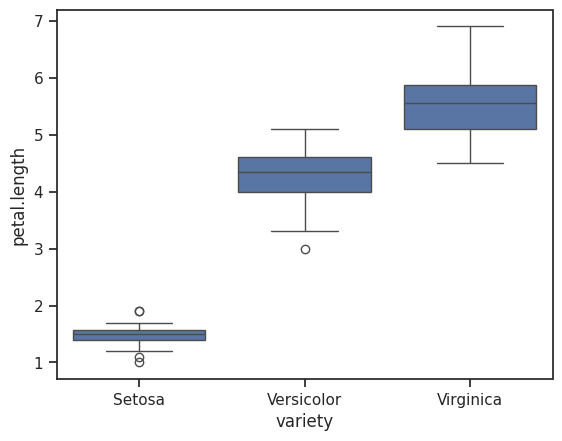

In [ ]:
sns.boxplot(x='variety', y='petal.length', data=iris)

<Axes: xlabel='variety', ylabel='petal.width'>

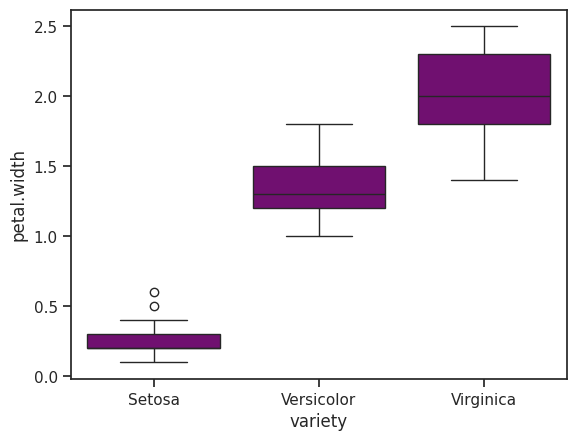

In [ ]:
sns.boxplot(x='variety', y='petal.width', data=iris, color='purple')

In [ ]:
X=iris.drop(columns=['variety'])
Y=iris['variety']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=20)
#train_test_split will evenly divide the data so that model can be predicted
#Y_test is always unknown
#stratify arranges data in a proper manner
#random state works as a seed to normalise ur data

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
Y_train.shape

(120,)

In [ ]:
Y_test.shape

(30,)

##Data Pre-Processing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train) #has multiple param in training data
scaler.transform(X_test) #has only one column

array([[ 1.18652219, -0.53831098,  0.58626573,  0.27556001],
       [ 1.06524224,  0.16638703,  0.35877378,  0.27556001],
       [-1.11779688, -1.47790834, -0.26682911, -0.25564001],
       [ 0.21628258, -0.06851231,  0.58626573,  0.80676004],
       [-0.99651693,  0.87108505, -1.23366993, -1.05244006],
       [-1.11779688,  0.16638703, -1.29054292, -1.45084008],
       [-0.14755727, -1.00810966, -0.15308313, -0.25564001],
       [-0.14755727, -0.06851231,  0.2450278 ,  0.00996   ],
       [ 0.45884248,  0.87108505,  0.92750367,  1.47076008],
       [ 0.70140238, -0.30341164,  0.30190079,  0.14276001],
       [ 0.33756253, -0.06851231,  0.64313872,  0.80676004],
       [ 0.58012243,  0.63618571,  0.52939275,  0.54116003],
       [ 1.67164199,  1.34088372,  1.3256146 ,  1.73636009],
       [-0.75395703,  0.87108505, -1.34741591, -1.31804007],
       [ 1.18652219, -0.06851231,  0.98437666,  1.20516007],
       [ 2.52060165,  1.8106824 ,  1.49623357,  1.07236006],
       [-0.99651693,  0.

##Step 4: Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, Y_train)
#X_train - data
#Y_train - labels

KNeighborsClassifier(n_neighbors=7)

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:") #non-diagonal elements tells incorrect classification
print(result)
result1 = classification_report(Y_test, Y_pred)
print("Classification Report:") #diagonal elements tells us correct classification
print(result1)
result2 = accuracy_score(Y_test, Y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


##HyperTuning


In [ ]:
from sklearn import neighbors
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score
f1_list=[]
k_list=[]
for k in range(1,10):
  clf=neighbors.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  clf.fit(X_train, Y_train)
  pred= clf.predict(X_test)
  f=f1_score(Y_test, pred ,average='macro')
  f1_list.append(f)
  k_list.append(k)

##Plot F1 Score VS K Value

Text(0, 0.5, 'F1 Score')

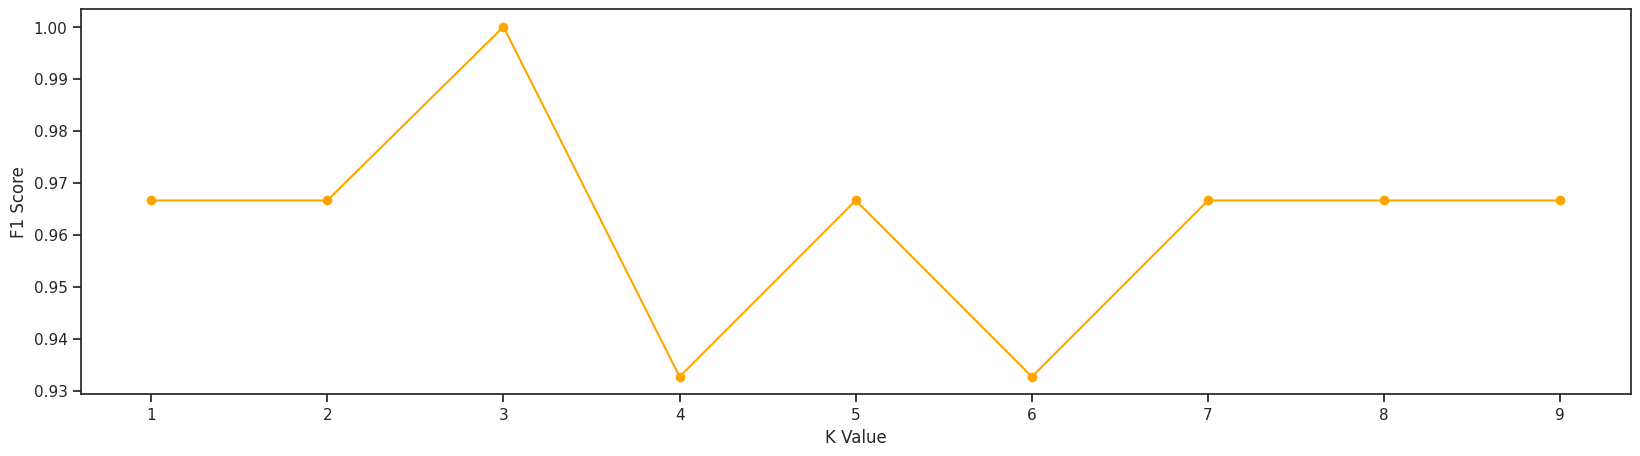

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(k_list, f1_list, marker='o', color='orange')
plt.xlabel("K Value")
plt.ylabel("F1 Score")

In [ ]:
best_f1_score= max(f1_list)
best_k= list[f1_list.index(best_f1_score)]
print("Optimum K Value=",best_k,"with F1-Score=",best_f1_score)

Optimum K Value= list[2] with F1-Score= 1.0


##Euclidian Distance

In [ ]:
from sklearn.metrics import euclidean_distances

# Calculate the Euclidean distances between corresponding rows in X_train and X_test
distances = euclidean_distances(X_test, X_train)

# Print the distances
for i in range(len(X_test)):
    print(distances[i])

[1.3114877  4.04722127 3.92173431 4.18330013 4.05215992 1.3453624
 2.42899156 0.31622777 4.0607881  0.79372539 1.77482393 2.18632111
 1.71464282 4.24264069 4.42831797 3.94715087 2.51197134 1.47648231
 1.         1.2489996  0.45825757 0.42426407 1.83030052 1.55884573
 1.08166538 0.9486833  0.8660254  0.72111026 4.3324358  4.35889894
 1.30384048 0.81853528 3.68239053 1.13578167 1.40712473 2.39374184
 4.00374824 4.08044115 1.5        1.55884573 4.15812458 1.34164079
 3.88587185 4.1        0.81853528 0.6        4.08044115 4.65510472
 0.64807407 4.10365691 4.23910368 1.28840987 0.59160798 4.14608249
 1.25698051 1.79443584 1.63401346 1.04880885 1.26095202 1.12249722
 0.79372539 1.02956301 1.36381817 3.98371686 3.94588393 0.48989795
 2.463737   0.71414284 3.71214224 1.33041347 0.34641016 1.38564065
 1.06301458 1.96977156 0.88317609 1.3190906  3.86781592 3.9987498
 1.06301458 4.1024383  1.50996689 0.37416574 3.82230297 4.01870626
 3.76961536 0.88317609 1.161895   3.99124041 0.83666003 1.838477